# SDXL LoRA Pipeline
Goal: create a pipeline to create and use LoRAs with SDXL

## Steps
- [x] run sdxl locally
- [ ] use 3rd party LoRA
- [ ] create a LoRA
- [ ] train a LoRA
- [ ] use a LoRA
- [ ] use LoRA for image to image generation

In [5]:
# test sdxl installation

# see: https://huggingface.co/docs/diffusers/en/using-diffusers/sdxl

from diffusers import StableDiffusionXLPipeline
import torch

pipeline = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")



Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 11.89it/s]


100%|██████████| 24/24 [00:10<00:00,  2.34it/s]


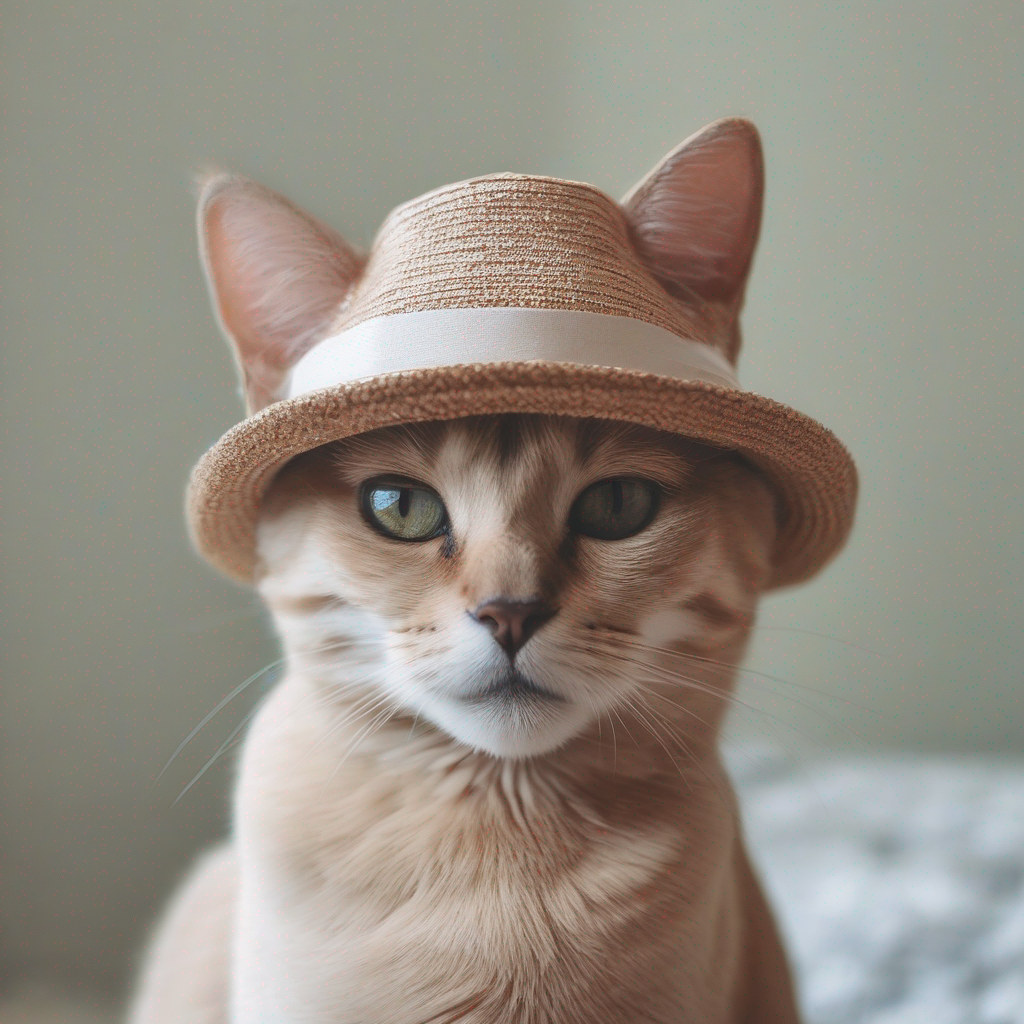

In [7]:
# text to image
text = "A photo of a cat with a hat"
output = pipeline(text, num_inference_steps=24)
img = output.images[0]
display(img)

In [13]:
# unload old model to free up memory
del pipeline

# image to image
prompt = "dog"
# use image of cat as input

from diffusers import StableDiffusionXLImg2ImgPipeline

pipeline = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")



Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 11.17it/s]


100%|██████████| 11/11 [00:04<00:00,  2.67it/s]


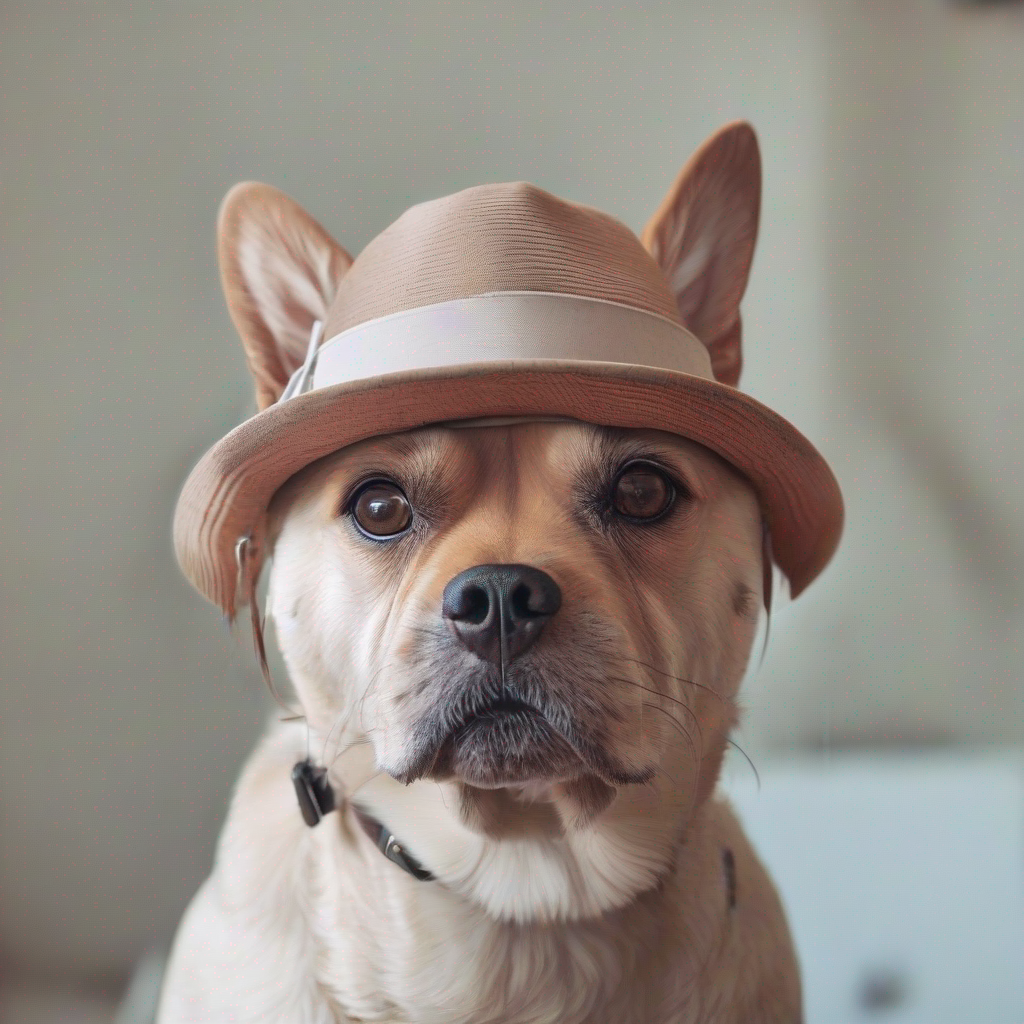

In [14]:
img2 = pipeline(prompt, strength=0.7, guidance_scale=12, num_inference_steps=16, image=img).images[0]
display(img2)